In [1]:
using QuantumCumulants, OrdinaryDiffEq
using ModelingToolkit, DelimitedFiles
using Symbolics
using Plots
using CSV, DataFrames
using QuantumOptics
using Dates

In [2]:
import Pkg

versioninfo()

version_info = Pkg.status([ "QuantumOptics","QuantumCumulants",
                            "SymbolicUtils","ModelingToolkit",
                            "StochasticDiffEq",
                            "DifferentialEquations",
                            "Statistics"])
print(version_info);

Julia Version 1.10.5
Commit 6f3fdf7b362 (2024-08-27 14:19 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 64 × Intel(R) Xeon(R) Gold 6326 CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, icelake-server)
Threads: 1 default, 0 interactive, 1 GC (on 64 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/lib64
  JULIA_NUM_THREADS = 
Status `~/.julia/environments/v1.10/Project.toml`
⌃ [961ee093] ModelingToolkit v9.7.1
  [35bcea6d] QuantumCumulants v0.3.1
  [6e0679c1] QuantumOptics v1.0.15
Info Packages marked with ⌃ have new versions available and may be upgradable.
nothing

## Collective operator with Collective dephasing

OAT Hamiltonian :
\begin{equation}
H = \chi J_z^2
\end{equation}

Master equation :
\begin{equation}
\dot{\rho}(t)=-\frac i\hbar[H(t),\rho(t)]+\sum_n\frac12\left[2C_n\rho(t)C_n^\dagger-\rho(t)C_n^\dagger C_n-C_n^\dagger C_n\rho(t)\right]
\end{equation}

Initial state :
\begin{equation}
|\psi\rangle = |\theta = \pi/2, \phi = 0\rangle
\end{equation}

<style>
.center 
{
  width: auto;
  display: table;
  margin-left: auto;
  margin-right: auto;
}
</style>

<div class="center">

| Collapse operators | Decay rate  | 
| :--------  | :-----  |
| $J_-$ | $\gamma_c$ |
| $\sigma_-^i$ | $\gamma_i$  |

</div>

In [4]:
@cnumbers   χ N γc γi;
@syms t::Real;

(t,)

In [6]:
h = SpinSpace("spinspace")  
Jx = Spin(h,"J1",1)  
Jy = Spin(h,"J1",2)
Jz = Spin(h,"J1",3)  
Jm = Jx - 1im*Jy     
Jp = Jx + 1im*Jy 

(J1x+0 + 1im*(J1y))

In [7]:
H = χ*Jz^2   
J = [Jm]                
rates = [γc] 

1-element Vector{SymbolicUtils.BasicSymbolic{Parameter}}:
 γc

In [8]:
ops = [Jx,Jy,Jz]      
eqs = meanfield(ops,H,J,rates = rates,order=2); 
eqs_c = complete(eqs);  
eqs_c = simplify(eqs_c)

∂ₜ(⟨J1x⟩) = (-2 + 0im)⟨J1y*J1z⟩*χ + ⟨J1x*J1z⟩*γc + (-0.5 - 0.0im)⟨J1x⟩*γc + (0 + 1im)*⟨J1x⟩*χ + (0.0 + 0.5im)*⟨J1y⟩*γc
∂ₜ(⟨J1y⟩) = ⟨J1y*J1z⟩*γc + 2⟨J1x*J1z⟩*χ + (0.0 - 0.5im)*⟨J1x⟩*γc + (-0.5 + 0.0im)⟨J1y⟩*γc + (0 + 1im)*⟨J1y⟩*χ
∂ₜ(⟨J1z⟩) = -⟨J1x*J1x⟩*γc + -⟨J1y*J1y⟩*γc + -⟨J1z⟩*γc
∂ₜ(⟨J1y*J1z⟩) = (-2.5 + 0.0im)⟨J1y*J1z⟩*γc + (0 + 1im)*⟨J1y*J1z⟩*χ + (0.0 + 0.5im)*⟨J1x*J1z⟩*γc + (0.0 + 1.0im)*⟨J1x⟩*γc + 2(⟨J1z*J1z⟩*⟨J1x⟩ + 2⟨J1z⟩*⟨J1x*J1z⟩ - 2(⟨J1z⟩^2)*⟨J1x⟩)*χ + (-⟨J1x*J1x⟩*⟨J1y⟩ + (-3.0 + 0.0im)⟨J1y*J1y⟩*⟨J1y⟩ + ⟨J1z*J1z⟩*⟨J1y⟩ + 2⟨J1y*J1z⟩*⟨J1z⟩ + (-2.0 - 0.0im)⟨J1x*J1y⟩*⟨J1x⟩ - 2(⟨J1z⟩^2)*⟨J1y⟩ + (2.0 + 0.0im)(⟨J1x⟩^2)*⟨J1y⟩ + (2.0 - 0.0im)(⟨J1y⟩^3))*γc
∂ₜ(⟨J1x*J1z⟩) = (0.0 + 1.5im)*⟨J1y*J1z⟩*γc + (-2.5 + 0.0im)⟨J1x*J1z⟩*γc + (0 + 1im)*⟨J1x*J1z⟩*χ + (0.0 - 1.0im)*⟨J1y⟩*γc + (⟨J1x⟩ + (-3.0 + 0.0im)⟨J1x*J1x⟩*⟨J1x⟩ + -⟨J1y*J1y⟩*⟨J1x⟩ + ⟨J1z*J1z⟩*⟨J1x⟩ + 2⟨J1z⟩*⟨J1x*J1z⟩ + (-2.0 + 0.0im)⟨J1x*J1y⟩*⟨J1y⟩ - 2(⟨J1z⟩^2)*⟨J1x⟩ + (2.0 - 0.0im)(⟨J1x⟩^3) + (2.0 - 0.0im)⟨J1x⟩*(⟨J1y⟩^2))*γc + (-2 

In [9]:
N_ = 5   
bs = SpinBasis(N_/2)    
θ = π/2                  
ϕ = 0
ψ0 = coherentspinstate(bs,θ,ϕ)  
u0 = initial_values(eqs_c,ψ0);  

In [10]:
χ_ = 1;  
γc_ =  0.01; 

ps=[χ,γc];    
ps_=[χ_,γc_];

In [13]:
@named sys = ODESystem(eqs_c)  
tmax = 20                      
prob0=ODEProblem(sys, u0, (0.0, tmax), (ps.=>ps_)); 

In [14]:
sol0=solve(prob0, Tsit5(), saveat=0.05, maxiters=1e10, reltol=1e-5, abstol=1e-5,);

In [15]:
Jx_t=real.(sol0[1,:]);
Jy_t=real.(sol0[2,:]);
Jz_t=real.(sol0[3,:]);

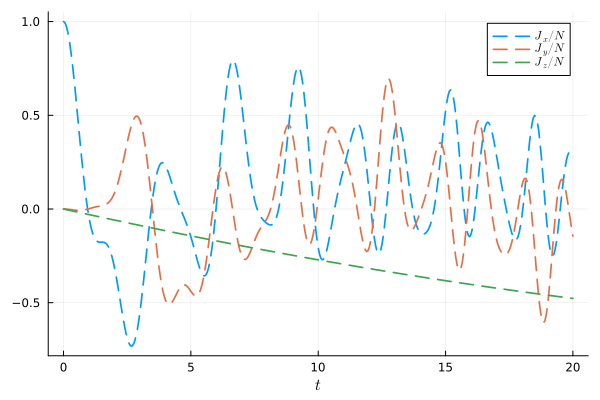

In [18]:
plot(sol0.t, Jx_t/(N_/2), label="\$J_x/N\$", linestyle=:dash,linewidth=1.7,xlabel="\$t\$")
plot!(sol0.t, Jy_t/(N_/2), label="\$J_y/N\$", linestyle=:dash,linewidth=1.7,xlabel="\$t\$")
plot!(sol0.t, Jz_t/(N_/2), label="\$J_z/N\$", linestyle=:dash,linewidth=1.7,xlabel="\$t\$")

## Individual operator with Individual and collective dephasing  (V1)

In [3]:
@cnumbers   χ N γc γi;
@syms t::Real;

In [4]:
N = 5

5

In [5]:
ha = ⊗([NLevelSpace(Symbol(:atom,i),2) for i=1:N]...)
σ(i,j,k) = Transition(ha,Symbol("σ_{$k}"),i,j,k);

In [16]:
H = χ*sum((σ(2,2,i)-1/2) for i=1:N)*sum((σ(2,2,j)-1/2) for j=1:N);
# J = [[σ(1,2,i) for i=1:N]; ];
# rates = [[γi for i=1:N];];
J = Vector{Any}()
push!(J,sum(σ(1,2,i) for i=1:N))
for i in 1:5
    push!(J, σ(1, 2, i))
end
rates =  [γc];
for i in 1:5
    push!(rates,γi)
end

In [17]:
ops = [σ(2,2,1),σ(2,2,2),σ(1,2,1)]
eqs = meanfield(ops,H,J,rates = rates,order=2); 
eqs_c = complete(eqs);  
eqs_c = simplify(eqs_c)

∂ₜ(⟨σ_{1}22⟩) = -0.5⟨σ_{1}21*σ_{3}12⟩*γc - 0.5⟨σ_{1}12*σ_{2}21⟩*γc - 0.5⟨σ_{1}12*σ_{5}21⟩*γc - 0.5⟨σ_{1}21*σ_{5}12⟩*γc - 0.5⟨σ_{1}21*σ_{4}12⟩*γc - 0.5⟨σ_{1}21*σ_{2}12⟩*γc - 0.5⟨σ_{1}12*σ_{3}21⟩*γc - 0.5⟨σ_{1}12*σ_{4}21⟩*γc + ⟨σ_{1}22⟩*(-γc - γi)
∂ₜ(⟨σ_{2}22⟩) = -0.5⟨σ_{1}12*σ_{2}21⟩*γc - 0.5⟨σ_{2}12*σ_{5}21⟩*γc + ⟨σ_{2}22⟩*(-γc - γi) - 0.5⟨σ_{2}12*σ_{4}21⟩*γc - 0.5⟨σ_{2}21*σ_{4}12⟩*γc - 0.5⟨σ_{1}21*σ_{2}12⟩*γc - 0.5⟨σ_{2}21*σ_{5}12⟩*γc - 0.5⟨σ_{2}21*σ_{3}12⟩*γc - 0.5⟨σ_{2}12*σ_{3}21⟩*γc
∂ₜ(⟨σ_{1}12⟩) = -0.5⟨σ_{4}12⟩*γc + (0 - 2im)*⟨σ_{1}12*σ_{5}22⟩*χ + (⟨σ_{1}22*σ_{5}12⟩ + ⟨σ_{1}22*σ_{2}12⟩ + ⟨σ_{1}22*σ_{4}12⟩ + ⟨σ_{1}22*σ_{3}12⟩)*γc + (0 - 2im)*⟨σ_{1}12*σ_{4}22⟩*χ + (0 - 2im)*⟨σ_{1}12*σ_{3}22⟩*χ - 0.5⟨σ_{2}12⟩*γc - 0.5⟨σ_{5}12⟩*γc - 0.5⟨σ_{1}12⟩*(γc + γi) + (0.0 + 4.0im)*⟨σ_{1}12⟩*χ + (0 - 2im)*⟨σ_{1}12*σ_{2}22⟩*χ - 0.5⟨σ_{3}12⟩*γc
∂ₜ(⟨σ_{1}21*σ_{3}12⟩) = ⟨σ_{1}21*σ_{3}12⟩*(-γc - γi) + 2.0⟨σ_{1}22*σ_{3}22⟩*γc - 0.5⟨σ_{3}12*σ_{4}21⟩*γc - 0.5⟨σ_{1}21*σ_{5}12⟩*γc - 0.5⟨σ_{1}21*σ_{4}12⟩*γ

## Individual operator with Individual and collective dephasing  (V2)

In [18]:
@cnumbers   χ N γc γi;
@syms t::Real;

In [20]:
ha = NLevelSpace(:atom, 2)
σ(α,β,i) = IndexedOperator(Transition(ha, :σ, α, β),i)

σ (generic function with 1 method)

In [38]:
k = Index(ha,:k,N,ha)
j = Index(ha,:j,N,ha)
i = Index(ha,:i,N,ha)
l = Index(ha,:l,N,ha)

Index(ℋ(atom), :l, N, 1)

In [39]:
H =χ*∑((σ(2,2,i)-1/2),i)*∑((σ(2,2,j)-1/2),j);

OAT Hamiltonian :
\begin{equation}
H = \chi J_z^2
\end{equation}

Quantum langevin equation :
\begin{equation}
\dot{\mathcal{O}}=\frac i\hbar[H,\mathcal{O}]+\sum_n\frac{\gamma_n}2\left(2c_n^\dagger\mathcal{O}c_n-c_n^\dagger c_n\mathcal{O}-\mathcal{O}c_n^\dagger c_n\right)+\mathrm{noise}.
\end{equation}

<style>
.center 
{
  width: auto;
  display: table;
  margin-left: auto;
  margin-right: auto;
}
</style>

<div class="center">

| Collapse operators | Decay rate  | 
| :--------  | :-----  |
| $J_-$ | $\gamma_c$ |
| $\sigma^{12}_i$ | $\gamma_i$  |

</div>


Cuz that:
\begin{equation}
J_z = \frac{1}{2}\sum_{i=1}^N(2\sigma^{22}_i -1)
\end{equation}

\begin{equation}
J_- = \sum_{i=1}^N \sigma^{12}_i
\end{equation}


we can rewrite the Hamiltonian:
\begin{equation}
H =  \frac{\chi}{4} \sum_{i=1}^N(2\sigma^{22}_i -1)\sum_{j=1}^N(2\sigma^{22}_i -1) 
\end{equation}

\begin{equation}
H =   \sum_{i\neq j}^N\sum_{j\neq i}^N (\chi (\sigma^{22}_i\sigma^{22}_j) - \frac{\chi}{2}(\sigma^{22}_j + \sigma^{22}_i) ) + \chi \frac{N^2}{4}
\end{equation}

\begin{equation}
H = \chi(N(N-1)\sigma_1^{22}\sigma_2^{22}-\frac{N(N-1)}{2}(\sigma_1^{22}+\sigma_2^{22})+\frac{N^2}{4})
\end{equation}

So we can get the QLE:
\begin{equation}
\frac{d}{dt}  \sigma_1^{22} = \frac{i}{\hbar} [H,\sigma_1^{22}] + \sum_{i=1}^N \frac{\gamma_i}{2}(2\sigma_i^{21} \sigma_1^{22} \sigma_i^{12} - \sigma_i^{21}\sigma_i^{12} \sigma_1^{22} - \sigma_1^{22}\sigma_i^{21}\sigma_i^{12} ) + \frac{\gamma_c}{2}(2\sum_{i=1}^N \sigma^{21}_i \sigma_1^{22} \sum_{j=1}^N \sigma^{12}_j - \sum_{i=1}^N \sigma^{21}_i \sum_{j=1}^N \sigma^{12}_j \sigma_1^{22} - \sigma_1^{22}\sum_{i=1}^N \sigma^{21}_i \sum_{j=1}^N \sigma^{12}_j)
\end{equation}

we can simplify the upper equation step by step :
\begin{equation}
[H,\sigma_1^{22}]  =  \sum_{i\neq j}^N\sum_{j\neq i}^N (\chi (\sigma^{22}_i\sigma^{22}_j) - \frac{\chi}{2}(\sigma^{22}_j + \sigma^{22}_i) )\sigma_1^{22} - \sigma_1^{22}\sum_{i\neq j}^N\sum_{j\neq i}^N (\chi (\sigma^{22}_i\sigma^{22}_j) - \frac{\chi}{2}(\sigma^{22}_j + \sigma^{22}_i) ) = 0
\end{equation}

\begin{equation}
\sum_{i=1}^N \frac{\gamma_i}{2}(2\sigma_i^{21} \sigma_1^{22} \sigma_i^{12} - \sigma_i^{21}\sigma_i^{12} \sigma_1^{22} - \sigma_1^{22}\sigma_i^{21}\sigma_i^{12} ) =  -\gamma_i \sigma_1^{22}
\end{equation}

\begin{equation}
\frac{\gamma_c}{2}(2\sum_{i=1}^N \sigma^{21}_i \sigma_1^{22} \sum_{j=1}^N \sigma^{12}_j - \sum_{i=1}^N \sigma^{21}_i \sum_{j=1}^N \sigma^{12}_j \sigma_1^{22} - \sigma_1^{22}\sum_{i=1}^N \sigma^{21}_i \sum_{j=1}^N \sigma^{12}_j) =  \frac{\gamma_c}{2}(-\sigma^{21}_1 \sum_{j\neq 1}^N \sigma^{12}_j -  \sum_{i\neq 1}^N \sigma^{21}_i \sigma^{12}_1 - 2\sigma^{22}_1) = -\gamma_c( (N-1) \sigma_1^{12} \sigma_2^{21} + \sigma_1^{22} )
\end{equation}

so finally we get:
\begin{equation}
\frac{d}{dt}  \sigma_1^{22} =  -\gamma_i \sigma_1^{22} - \frac{\gamma_c}{2}( (N-1) \sigma_1^{12} \sigma_2^{21} + (N-1) \sigma_1^{21} \sigma_2^{12}  + 2\sigma_1^{22} )= -\gamma_i \sigma_1^{22} - \gamma_c( (N-1) \sigma_1^{12} \sigma_2^{21} + \sigma_1^{22} ) 
\end{equation}

We also can calculate the QLE of $ \sigma_1^{12} $
\begin{equation}
[H,\sigma_1^{12}]  =  \sum_{i\neq j}^N\sum_{j\neq i}^N (\chi (\sigma^{22}_i\sigma^{22}_j) - \frac{\chi}{2}(\sigma^{22}_j + \sigma^{22}_i) )\sigma_1^{12} - \sigma_1^{12}\sum_{i\neq j}^N\sum_{j\neq i}^N (\chi (\sigma^{22}_i\sigma^{22}_j) - \frac{\chi}{2}(\sigma^{22}_j + \sigma^{22}_i) ) = -\sum_{j\neq 1}^N (\frac{\chi}{2} \sigma_1^{12} \sigma_j^{22}) -\sum_{i\neq 1}^N (\frac{\chi}{2} \sigma_1^{12} \sigma_i^{22}) -\sum_{j\neq 1}^N (\chi \sigma_1^{12} \sigma_j^{22} - \frac{\chi}{2}(\sigma_1^{12} \sigma^{22}_j + \sigma^{12}_1))  -\sum_{i\neq 1}^N (\chi \sigma_1^{12} \sigma_i^{22} - \frac{\chi}{2}(\sigma_1^{12} \sigma^{22}_i + \sigma^{12}_1)) = -\chi (N-1)(2\sigma_1^{12} \sigma_2^{22}-\sigma_1^{12} )
\end{equation}

\begin{equation}
\sum_{i=1}^N \frac{\gamma_i}{2}(2\sigma_i^{21} \sigma_1^{12} \sigma_i^{12} - \sigma_i^{21}\sigma_i^{12} \sigma_1^{12} - \sigma_1^{12}\sigma_i^{21}\sigma_i^{12} ) =  -\frac{\gamma_i}{2} \sigma_1^{12}
\end{equation}

\begin{equation}
\frac{\gamma_c}{2}(2\sum_{i=1}^N \sigma^{21}_i \sigma_1^{12} \sum_{j=1}^N \sigma^{12}_j - \sum_{i=1}^N \sigma^{21}_i \sum_{j=1}^N \sigma^{12}_j \sigma_1^{12} - \sigma_1^{12}\sum_{i=1}^N \sigma^{21}_i \sum_{j=1}^N \sigma^{12}_j) =  \frac{\gamma_c}{2}(2 \sigma^{22}_1 \sum_{j\neq 1}^N \sigma^{12}_j -  \sum_{j\neq 1}^N \sigma^{12}_j \sigma^{22}_1 - \sigma^{11}_1\sum_{j\neq 1}^N \sigma^{12}_j ) -  \frac{\gamma_c}{2} \sigma^{12}_1 = \gamma_c( (N-1) \sigma_1^{22} \sigma_2^{12} -\frac{N-1}{2} \sigma_2^{12}  - \sigma_1^{12} ) = \gamma_c( (N-1) \sigma_1^{22} \sigma_2^{12} -\frac{N}{2} \sigma_1^{12} )
\end{equation}

so we can get: 
\begin{equation}
\frac{d}{dt}  \sigma_1^{12} =  -i\chi (N-1)(2\sigma_1^{12} \sigma_2^{22}-\sigma_1^{12} ) -\frac{\gamma_i}{2} \sigma_1^{12} + \gamma_c( (N-1) \sigma_1^{22} \sigma_2^{12} -\frac{N}{2} \sigma_1^{12} )
\end{equation}


To conclude:

\begin{equation}
\frac{d}{dt}  \sigma_1^{22} = -\gamma_i \sigma_1^{22} - \gamma_c( (N-1) \sigma_1^{12} \sigma_2^{21} + \sigma_1^{22} ) 
\end{equation}


\begin{equation}
\frac{d}{dt}  \sigma_1^{12} =  -i\chi (N-1)(2\sigma_1^{12} \sigma_2^{22}-\sigma_1^{12} ) -\frac{\gamma_i}{2} \sigma_1^{12} + \gamma_c( (N-1) \sigma_1^{22} \sigma_2^{12} -\frac{N}{2} \sigma_1^{12} )
\end{equation}


In [178]:
J = Vector{Any}()
# push!(J,∑((σ(1,2,i)),i))
push!(J, σ(1,2,i)) 
# push!(J, σ(1,2,j))
rates = []
# rates =  [γc];
push!(rates,γi)
# push!(rates,γi)
# push!(J, σ(1, 2, j))?
ops = [σ(2,2,l),σ(1,2,l)];

In [179]:
eqs = meanfield(ops,H,J;rates= rates,order = 2);
eqs_c = complete(eqs);
eqs_sc = scale(eqs_c)

∂ₜ(⟨σ221⟩) = -⟨σ221⟩*γi
∂ₜ(⟨σ121⟩) = -0.5⟨σ121⟩*γi + (0 - 1im)*⟨σ121⟩*χ + (0.0 + 1.0im)*N*⟨σ121⟩*χ + (0 - 2im)*(-1 + N)*⟨σ221*σ122⟩*χ
∂ₜ(⟨σ221*σ122⟩) = -1.5⟨σ221*σ122⟩*γi + (0 - 3im)*⟨σ221*σ122⟩*χ + (0.0 + 1.0im)*N*⟨σ221*σ122⟩*χ + (0 - 1im)*(2(-2 + N)*⟨σ221*σ222⟩*⟨σ121⟩*χ + 4(-2 + N)*⟨σ221⟩*⟨σ221*σ122⟩*χ - 4(-2 + N)*⟨σ121⟩*(⟨σ221⟩^2)*χ)
∂ₜ(⟨σ221*σ222⟩) = -2.0⟨σ221*σ222⟩*γi


In [180]:
u0=zeros(ComplexF64, length(eqs_sc));
u0[1] = 1/2
u0[2] = 1/2
u0[3] = 1/4
u0[4] = 1/4

0.25

In [181]:
χ_ = 1;  
γi_ =  0.01; 
N_ = 5

ps=[χ,γi,N];    
ps_=[χ_,γi_,N_];

In [182]:
@named  sys=ODESystem(eqs_sc);
tmax = 20
prob0=ODEProblem(sys, u0, (0.0, tmax), (ps.=>ps_));

In [183]:
sol0=solve(prob0, Tsit5(), saveat=0.001, maxiters=1e10, reltol=1e-10, abstol=1e-10,);

In [184]:
Jx_t=N_/2*real.(sol0[2,:]+conj.(sol0[2,:]));
Jy_t=N_/2*real.(1im*(-sol0[2,:]+conj.(sol0[2,:])));
Jz_t=N_/2*real.(2*sol0[1,:].-1);

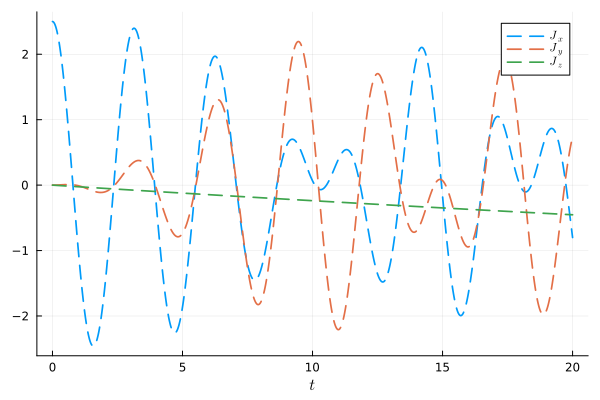

In [185]:
plot(sol0.t, Jx_t, label="\$J_x\$", linestyle=:dash,linewidth=1.7,xlabel="\$t\$")
plot!(sol0.t, Jy_t, label="\$J_y\$", linestyle=:dash,linewidth=1.7,xlabel="\$t\$")
plot!(sol0.t, Jz_t, label="\$J_z\$", linestyle=:dash,linewidth=1.7,xlabel="\$t\$")

### Try to implement the cllective dephase  

In [170]:
J = Vector{Any}()
push!(J,∑((σ(1,2,i)),i))
push!(J, σ(1,2,i))
push!(J, σ(1,2,j))
rates = []
rates =  [γc];
push!(rates,γi)
push!(rates,γi)

3-element Vector{SymbolicUtils.BasicSymbolic{Parameter}}:
 γc
 γi
 γi

In [190]:
@cnumbers   χ N γc γi;
@syms t::Real;
ha = NLevelSpace(:atom, 2)
σ(α,β,i) = IndexedOperator(Transition(ha, :σ, α, β),i)
k = Index(ha,:k,N,ha)
j = Index(ha,:j,N,ha)
i = Index(ha,:i,N,ha)
l = Index(ha,:l,N,ha)
H =χ*∑((σ(2,2,i)-1/2),i)*∑((σ(2,2,j)-1/2),j);


In [196]:
J = Vector{Any}()
push!(J,∑((σ(1,2,i)),i ))
# push!(J, σ(1,2,i))
push!(J, σ(1,2,j))
rates = []
rates =  [γc];
# push!(rates,γi)
push!(rates,γi)
ops = [σ(2,2,l),σ(1,2,l)];


In [197]:
eqs = meanfield(ops,H,J;rates= rates,order = 2);
eqs_c = complete(eqs);
eqs_sc = scale(eqs_c)

could not calculate meanfield-equations for operator σ22l


ErrorException: Specification of an extra Index is needed!

\begin{equation}
\sigma_1^{12} \sigma_2^{21} = \sigma_1^{21} \sigma_2^{12}  \quad ? 
\end{equation}